# Pymaceuticals Inc.
---
-The Capomulin and Ramicane drug regimens were the most effective in reducing tumor volume in mice. Infubinol and Ceftamin regimens had larger average final tumor volumes and greater tumor volume variance. A strong positive correlation (correlation coefficient of 0.84) was observed between mouse weight and average tumor volume for the Capomulin regimen. The linear regression plot confirmed that as mouse weight increased, average tumor volume also increased. Controlling for mouse weight is crucial when interpreting preclinical study results.
 
 Coding is not working for correlation and Regression.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "C:/Users/glamh/OneDrive/Desktop/Pymaceuticals/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "C:/Users/glamh/OneDrive/Desktop/Pymaceuticals/Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Combined_Mouse_Data_df = mouse_metadata.merge(study_results, how='inner',on='Mouse ID')

# Display the data table for preview
Combined_Mouse_Data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [25]:
# Checking the number of mice.
MouseCount = len(pd.unique(Combined_Mouse_Data_df['Mouse ID']))
print('Total Mice:',MouseCount)

Total Mice: 249


In [26]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Combined_Mouse_Data_df["ID_TP"] = Combined_Mouse_Data_df["Mouse ID"] + Combined_Mouse_Data_df["Timepoint"].astype(str)
Combined_Mouse_Data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID_TP
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
Dups_Df = Combined_Mouse_Data_df.value_counts("ID_TP")>1
Dups_Df.head()

ID_TP
g9895     True
g98920    True
g98915    True
g98910    True
g9890     True
Name: count, dtype: bool

In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_Mouse_Data_df = Combined_Mouse_Data_df.drop_duplicates(subset=['ID_TP'])
Clean_Mouse_Data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID_TP
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320


In [28]:
# Checking the number of mice in the clean DataFrame.
NewMouseCount = len(pd.unique(Clean_Mouse_Data_df['Mouse ID']))
print('Total Mice:',NewMouseCount)

Total Mice: 249


## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Filtered_Data_df = Clean_Mouse_Data_df[["Drug Regimen","Tumor Volume (mm3)"]]
Filtered_Data_df.head()
mean = Filtered_Data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = Filtered_Data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = Filtered_Data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_deviation = Filtered_Data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
S_E_M = Filtered_Data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

Summary_df = pd.DataFrame({"Tumor Mean": mean,
                         "Tumor Median": median,
                         "Tumor Variance": variance,
                         "Tumor St Dev": standard_deviation,
                          "Tumor SEM": S_E_M})
Summary_df.head()

,Tumor Mean,Tumor Median,Tumor Variance,Tumor St Dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [30]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


summary_df2 = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Deviation='std',
    SEM='sem'
)


summary_df2

,Mean,Median,Variance,Std_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

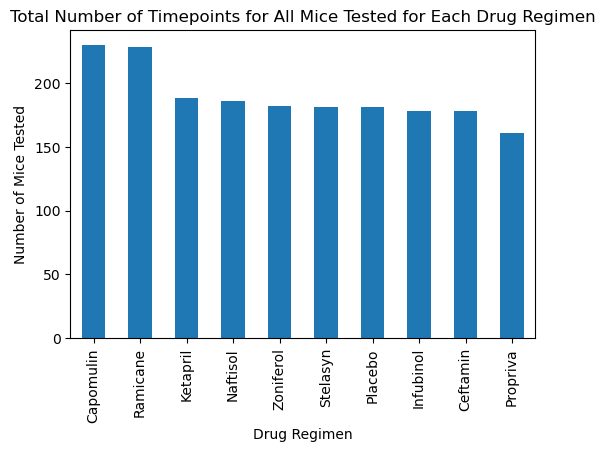

<Figure size 640x480 with 0 Axes>

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_tested = merge_df['Drug Regimen'].value_counts().sort_values(ascending=False)
timepoints_tested.plot(kind='bar', figsize=(6,4))
plt.title('Total Number of Timepoints for All Mice Tested for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()
plt.tight_layout()

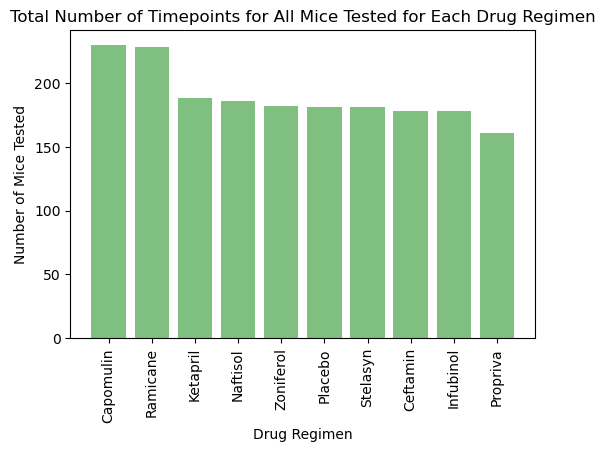

<Figure size 640x480 with 0 Axes>

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints_df = merge_df.groupby('Drug Regimen')['Timepoint'].count().reset_index(name='Total Timepoints')
timepoints_df = timepoints_df.sort_values(by='Total Timepoints', ascending=False)
plt.figure(figsize=(6,4))
plt.bar(timepoints_df['Drug Regimen'], timepoints_df['Total Timepoints'], color='green',alpha= 0.5)
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title('Total Number of Timepoints for All Mice Tested for Each Drug Regimen')
plt.show()
plt.tight_layout()

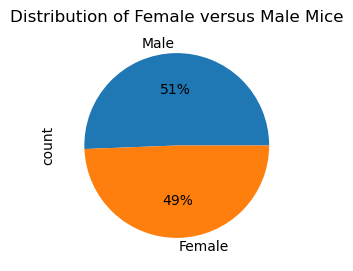

<Figure size 640x480 with 0 Axes>

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = merge_df["Sex"].value_counts()
gender_df.plot(kind="pie", y="Sex", figsize=(3, 3), autopct="%1.0f%%", startangle=0)
plt.title("Distribution of Female versus Male Mice")
plt.show()
plt.tight_layout()

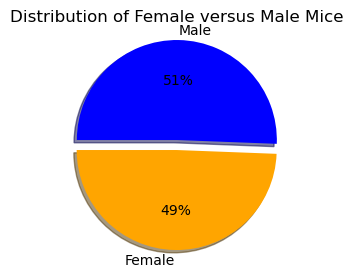

<Figure size 640x480 with 0 Axes>

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_grouped = merge_df.groupby(['Sex'])
sex_counts = sex_grouped['Mouse ID'].count()
plt.figure(figsize=(3,3))
explode = (0.1,0)
plt.pie(sex_counts, labels=sex_counts.index,colors = ['orange','blue'], explode= explode, autopct='%1.0f%%',shadow= True, startangle=180)
plt.title('Distribution of Female versus Male Mice')
plt.axis("equal")
plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Clean_Mouse_Data_df.head()
# Start by getting the last (greatest) timepoint for each mouse
Tumor_Volume_df = Clean_Mouse_Data_df.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max().reset_index(name="Timepoint")
Tumor_Volume_df.head()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Max_Tumor_Volume = Tumor_Volume_df.merge(Clean_Mouse_Data_df, how='inner',on=["Mouse ID","Timepoint","Drug Regimen"])
Max_Tumor_Volume.head()

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,ID_TP
0,Capomulin,b128,45,Female,9,22,38.982878,2,b12845
1,Capomulin,b742,45,Male,7,21,38.939633,0,b74245
2,Capomulin,f966,20,Male,16,17,30.485985,0,f96620
3,Capomulin,g288,45,Male,3,19,37.074024,1,g28845
4,Capomulin,g316,45,Female,22,22,40.159220,2,g31645


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_Vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in Treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Tumor_Vol_df = Clean_Mouse_Data_df.loc[Clean_Mouse_Data_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    
    # add subset 
    Tumor_Vol.append(Tumor_Vol_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = Tumor_Vol_df.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = Tumor_Vol_df.loc[(Tumor_Vol_df < lower_bound) | (Tumor_Vol_df > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")

For Capomulin, the outliers are: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
For Ramicane, the outliers are: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
For Infubinol, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


<Axes: title={'center': 'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

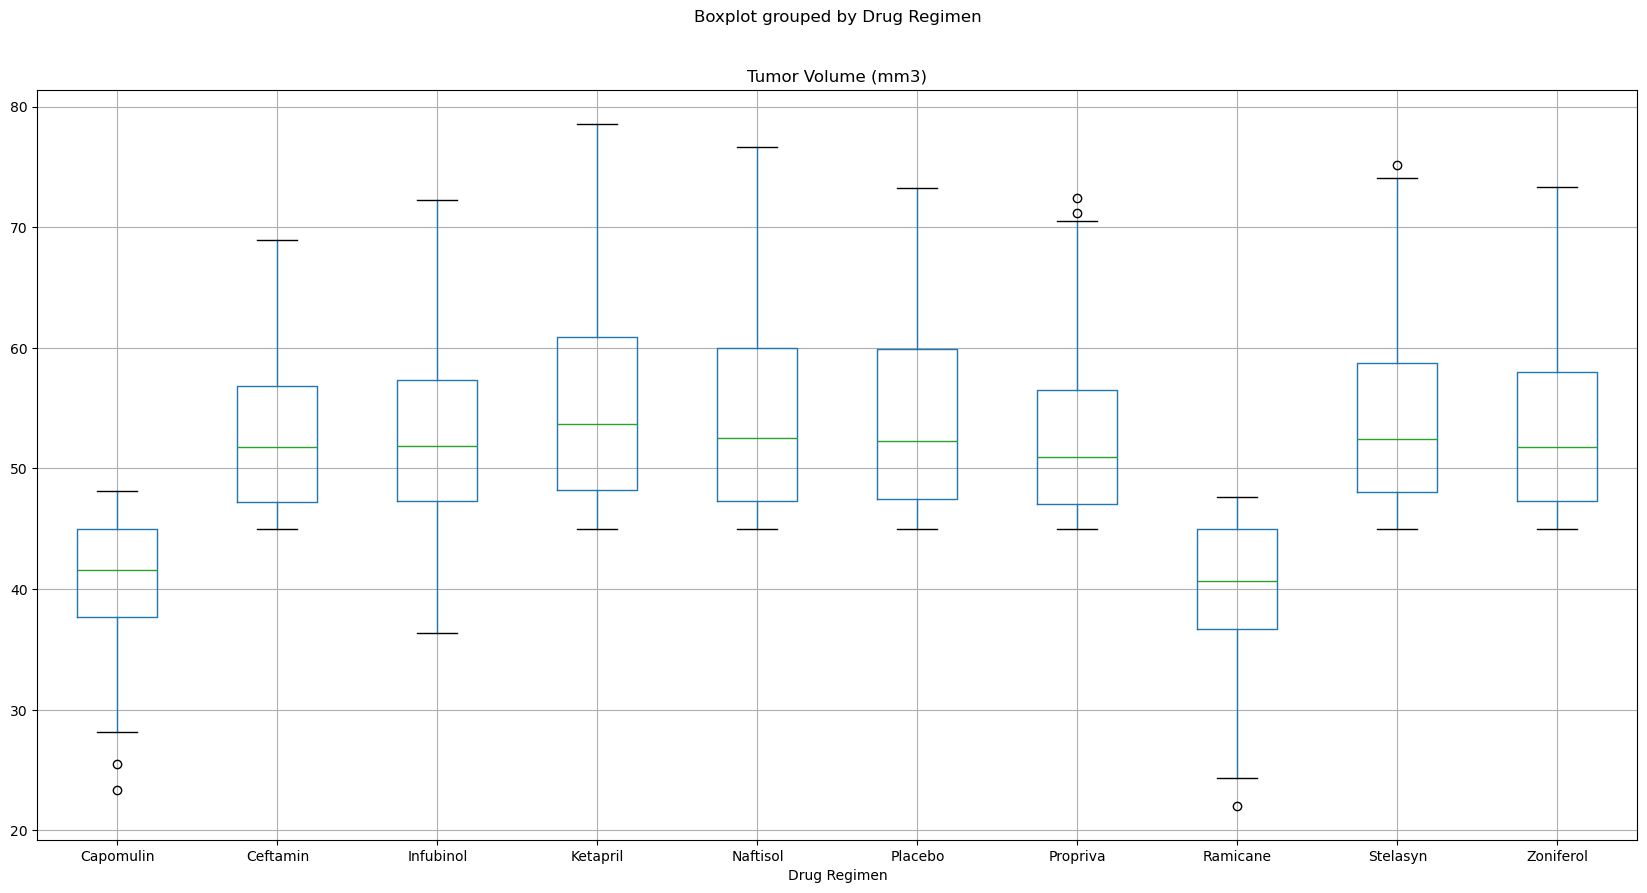

In [37]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Clean_Mouse_Data_df.boxplot("Tumor Volume (mm3)", by="Drug Regimen", figsize=(20, 10))



## Line and Scatter Plots

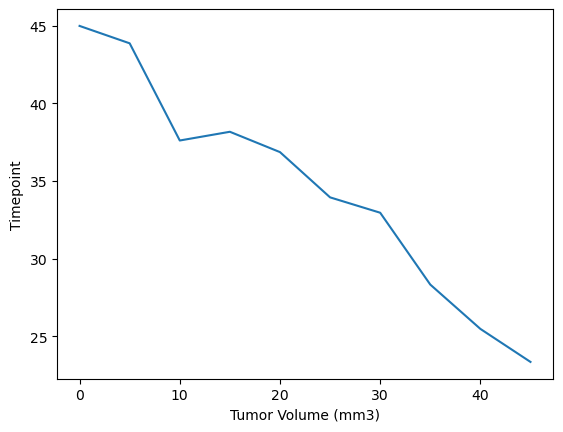

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = Clean_Mouse_Data_df[Clean_Mouse_Data_df["Drug Regimen"] == "Capomulin"] 
Single_Mouse_df = Capomulin_df[Capomulin_df["Mouse ID"]== "s185"]

plt.plot(Single_Mouse_df["Timepoint"], Single_Mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.show()



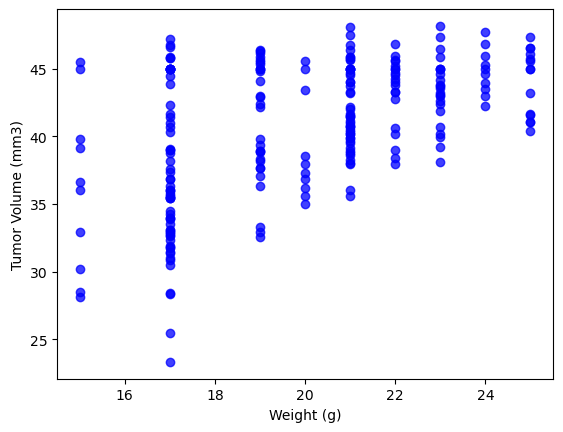

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(Capomulin_df["Weight (g)"], Capomulin_df["Tumor Volume (mm3)"], marker="o", facecolors="blue", alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [54]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()




NameError: name 'linregress' is not defined